In [2]:
#1
from random import *
import numpy as np
import matplotlib.pyplot as plt
def drunk_walk(nSteps):
    pos_int = 0
    position = []
    posquared = []
    for i in  range(nSteps):
        x = randrange(2)
        if x==0:
            pos_int = pos_int-1
        elif x==1:
            pos_int = pos_int+1
        position.append(pos_int)
    for i in range(nSteps):
        posquared.append(position[i]**2)
    return position
def drunk_walk2(nSteps):
    pos_int = 0
    position = []
    posquared = []
    for i in  range(nSteps):
        x = randrange(2)
        if x==0:
            pos_int = pos_int-1
        elif x==1:
            pos_int = pos_int+1
        position.append(pos_int)
    for i in range(nSteps):
        posquared.append(position[i]**2)
    return posquared

In [3]:
n = 1000
print(drunk_walk(n))
print(drunk_walk2(n))

[-1, -2, -1, -2, -3, -2, -1, -2, -1, 0, -1, 0, -1, -2, -3, -2, -1, -2, -3, -4, -5, -6, -5, -6, -7, -8, -9, -10, -11, -12, -11, -12, -11, -10, -11, -10, -9, -10, -9, -10, -11, -10, -11, -10, -9, -10, -11, -10, -9, -8, -9, -8, -7, -8, -7, -6, -7, -6, -5, -6, -7, -8, -7, -6, -7, -6, -7, -6, -7, -6, -5, -4, -3, -4, -5, -6, -7, -6, -5, -6, -5, -6, -5, -6, -7, -6, -7, -8, -7, -6, -7, -8, -9, -8, -9, -10, -11, -12, -11, -10, -11, -12, -11, -10, -11, -10, -11, -12, -11, -10, -11, -10, -9, -10, -11, -10, -11, -10, -9, -10, -11, -12, -11, -10, -9, -10, -11, -12, -11, -10, -11, -12, -11, -12, -13, -12, -13, -12, -13, -12, -13, -14, -13, -12, -11, -10, -11, -12, -11, -12, -11, -12, -13, -14, -13, -14, -15, -16, -17, -18, -19, -20, -19, -20, -19, -18, -17, -16, -15, -16, -17, -18, -19, -20, -19, -18, -17, -18, -19, -18, -19, -20, -21, -20, -21, -20, -21, -20, -19, -20, -19, -20, -19, -18, -19, -18, -19, -18, -17, -16, -15, -14, -13, -14, -15, -14, -15, -14, -13, -12, -13, -12, -11, -10, -9, -8, -7,

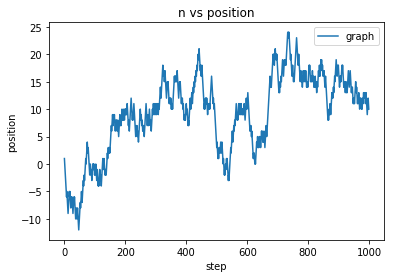

In [4]:
t_final = 1000
dt = 1
tpoints = np.arange(0,t_final,dt)
tt = np.array(tpoints)
positions = np.array(drunk_walk(1000))
plt.plot(tt,positions, label = 'graph')
plt.title("n vs position")
plt.xlabel('step')
plt.ylabel('position')
plt.legend() 
plt.show()

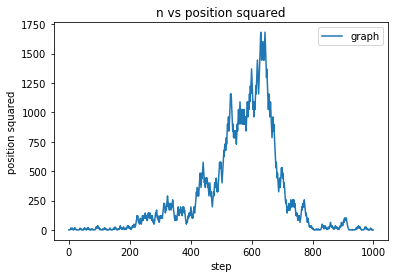

In [5]:
positions_squared = np.array(drunk_walk2(1000))
plt.plot(tt,positions_squared, label = 'graph')
plt.title("n vs position squared")
plt.xlabel('step')
plt.ylabel('position squared')
plt.legend() 
plt.show()

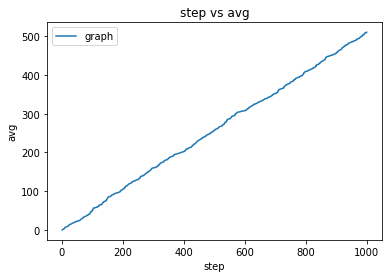

D =  0.253131706558


In [6]:
totalpeople = 1000
step = 1000
preavgtot = 0
avg = 0
count = 0
steparray = []
avgarray = []
def arrayavg(posq):
    steptotal = 0
    for i in range(len(posq)):
        steptotal += posq[i]
    return steptotal/len(posq)
for i in range(step):
    count += 1
    preavgtot += arrayavg(drunk_walk2(step))
    avg = preavgtot/totalpeople
    avgarray.append(avg)
    steparray.append(count)
stpar = np.array(steparray)
avgar = np.array(avgarray)
plt.plot(stpar,avgar, label = 'graph')
plt.title("step vs avg")
plt.xlabel('step')
plt.ylabel('avg')
plt.legend()
plt.show()
print("D = ", np.polyfit(stpar, avgar, 1)[0]/2)
## As we assign a rough line of best fit, the slope is approximately 0.5. Therefore D approximately 0.25 based on the given equation.

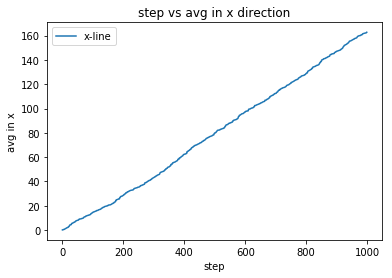

D₁ =  0.0834890509636


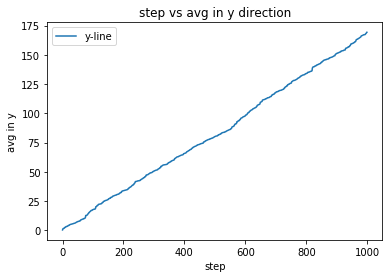

D₂ =  0.0837264242814


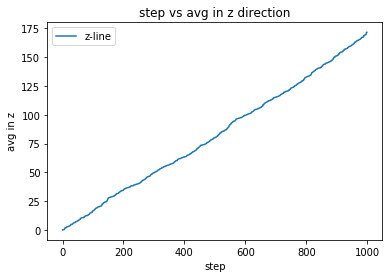

D₃ =  0.0837332729641

ΣD =  0.250711374891

The total of all D's of the 3 possible axes is the same as D for if there were movement was confined to one axis.


In [7]:
directions = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
step = 1000
numpeople = 1000
count = 0
pretot = [[0.0,0.0,0.0]]
davgarray = []
steparray = np.arange(0,step,1)
def ddrunkwalk(t):
    position = [[0,0,0]]
    post = np.array(position)
    posv = [post]
    posw = np.empty((0,3),int)
    for i in range(t):
        post += sample(directions,1)[0]
        posw = np.append(posw, post)
    return posw
def avg3d(array):
    array2 = np.array(array)
    array2 = array2 ** 2
    x = 0
    y = 0
    z = 0
    for i in range(len(array2)//3):
        x += array2[3*i]
        y += array2[3*i + 1]
        z += array2[3*i + 2]
    array3 = np.array([[x,y,z]])    
    return array3/step

pret = np.array(pretot)
for i in range(numpeople):
    pret += avg3d(ddrunkwalk(step))
    davgarray.append(pret/numpeople)
arrd = np.array(davgarray)
plt.plot(steparray,arrd[:,0,0], label = 'x-line')
plt.title("step vs avg in x direction")
plt.xlabel('step')
plt.ylabel('avg in x')
plt.legend()
plt.show()

print("D\u2081 = ", np.polyfit(steparray,arrd[:,0,0],1)[0] / 2)

plt.plot(steparray,arrd[:,0,1], label = 'y-line')
plt.title("step vs avg in y direction")
plt.xlabel('step')
plt.ylabel('avg in y')
plt.legend()
plt.show()

print(u"D\u2082 = ", np.polyfit(steparray,arrd[:,0,1],1)[0] / 2)

plt.plot(steparray,arrd[:,0,2], label = 'z-line')
plt.title("step vs avg in z direction")
plt.xlabel('step')
plt.ylabel('avg in z')
plt.legend()
plt.show()

print(u"D\u2083 = ", np.polyfit(steparray,arrd[:,0,2],1)[0] / 2)
print(u"\n\u03A3D = ", (np.polyfit(steparray,arrd[:,0,0],1)[0] + np.polyfit(steparray,arrd[:,0,2],1)[0] + np.polyfit(steparray,arrd[:,0,0],1)[0])/2)
print("\nThe total of all D's of the 3 possible axes is the same as D for if there were movement was confined to one axis.")

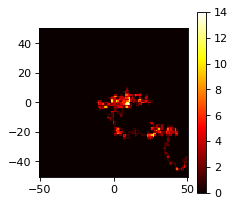

In [223]:
import time as time
import matplotlib as mpl
import matplotlib.animation as an
L = 101
directions = [[1,0],[-1,0],[0,1],[0,-1]]
position = [[0,0]]
pos = np.array(position)
positionarray = np.empty([0,2],int)
x = []
y = []

t = time.time()
while np.amax(pos) < 51 and np.amin(pos) > -51:
    pos += sample(directions,1)[0]
    positionarray = np.append(positionarray,pos)
for i in range(len(positionarray) // 2):
    x.append(positionarray[2*i])
    y.append(positionarray[2*i +1])
xedges = [-50.5]
yedges = [-50.5]
for i in range(101):
    xedges.append(xedges[i]+1.0)
    yedges.append(yedges[i]+1.0)
H, xedges, yedges = np.histogram2d(x, y,bins = [xedges, yedges])
H = H.T

mpl.rcParams['figure.figsize'] = [3.0,3.0]
mpl.rcParams['figure.dpi'] = 80
extent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(H,cmap = 'hot',extent=extent) 
plt.colorbar()
plt.show()


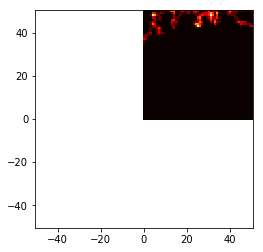

In [205]:
fig = plt.figure()
ax = plt.axes(xlim=(-50.5,50.5), ylim=(-50.5,50.5))
img = []
f = ax.plot([],[],lw=2)
def update(i):
    xdata = []
    ydata = []
    pic = []
    poc = []
    for t in range(len(x)):
        xdata.append(x[t])
        ydata.append(y[t])
        H,q,p = np.histogram2d(xdata, ydata,bins = [xedges, yedges])
        pic = (ax.imshow(H,cmap='hot'))
        img.append([pic])
    poc = np.array([img])
    return poc

ani = an.FuncAnimation(fig, update, frames = 100 , interval = 20, blit = False, repeat = False)
plt.show()


In [218]:
def nsphere(sample,dim):
    count = 0
    array = np.zeros(dim,int)
    for i in range(sample):
        for j in range(dim):
            array[j] = random()
        if np.sum((array)**2) <= 1:
            count +=1
    return 3.1415**(dim/2)/((dim/2)+1)*count**n

In [219]:
print(nsphere(1000,2))

OverflowError: int too large to convert to float